# Sparse Categorical Corss Entory

## SCCE Caluclation

### y_hat을 만들어주는 작업

In [37]:
import tensorflow as tf

from tensorflow.keras.losses import SparseCategoricalCrossentropy

batch_size, n_class = 7,5

# prediction을 만드는 이유:
# 마지막 Layer에서 Neuron의 갯수는 Class의 갯수와 같아야 함
# 아웃풋은  N x K(클래스의 갯수) 가 만들어진다.
# 임의의 prediction matrix를 만들어준 것.
predictions = tf.random.uniform(shape=(batch_size, n_class),
                                minval=0,
                                maxval=1,
                                dtype=tf.float32)
print("predictions ==============================================")
print(predictions.numpy())
# 이것을 만들어주는 이유는 각 열의 값은 확률이기 때문에 합이 1이되어야 함을 고려하기 위해서
pred_sum = tf.reduce_sum(predictions, axis=1)

# pred_sum을 Column 벡터로 만들어주기 위함
# (N x K)라는 행렬이 있을 때 i번째 열의 합은 1이 만들어지는 (Nx1)이라는 Column Vector를 만들어줌
# 그 다음에 이 Column Vector 를 Broad Casting을 통해 다시 뿌려줄 것임.
# reshape을 할 때, 랜덤으로 들어오는 어떠한 사이즈에 대해서 맞춰주기 위함 이라고 보면 됨
# 에를 들이 이번 경우에는 (16x1)로 reshape를 하는 경우인데 16이라는 숫자가 나중에 바뀔수도있고
# 다른 숫자 32가 들어올 수 도 있음. 이 변화하는 숫자에 대해서 Column Vector를 만들어 주기 위해서
# 처리해줄 수 있는 -1을 넣는 것임.
pred_sum = tf.reshape(pred_sum, (-1, 1))
print("pred_sum =================================================")
print(pred_sum.numpy())
print(predictions.shape, pred_sum.shape)

predictions = predictions/pred_sum
print("prediction processed =====================================")
print(predictions.numpy())

predictions ==============================================
[[0.71980596 0.09501362 0.59786546 0.5394273  0.79784095]
 [0.53706384 0.81403863 0.33352923 0.717852   0.2638774 ]
 [0.02917957 0.49629414 0.5918623  0.9250699  0.745893  ]
 [0.41167557 0.25508022 0.06948936 0.46741426 0.5940393 ]
 [0.8072827  0.599797   0.57932436 0.6564343  0.5022435 ]
 [0.34187043 0.00332987 0.3477323  0.9636748  0.1518979 ]
 [0.40244102 0.43474722 0.84750295 0.22171068 0.37120497]]
pred_sum =================================================
[[2.7499533]
 [2.666361 ]
 [2.788299 ]
 [1.7976987]
 [3.145082 ]
 [1.8085053]
 [2.277607 ]]
(7, 5) (7, 1)
prediction processed =====================================
[[0.26175207 0.03455099 0.21740931 0.1961587  0.29012892]
 [0.20142202 0.30529946 0.1250878  0.26922536 0.09896536]
 [0.01046501 0.17799172 0.21226645 0.33176854 0.26750824]
 [0.22900142 0.14189264 0.03865462 0.260007   0.3304443 ]
 [0.25668097 0.1907095  0.18420008 0.2087177  0.1596917 ]
 [0.18903479 0.00184

### y_true를 만들어주는 작업

In [38]:
labels = tf.random.uniform(shape=(batch_size, ),
                           minval=0,
                           maxval=n_class,
                           dtype=tf.int32)
print("labels ===================================================")
print(labels.numpy())


labels ===================================================
[0 1 0 0 2 1 1]


### loss 계산

In [43]:
loss_object = SparseCategoricalCrossentropy()
loss= loss_object(labels, predictions)
print("loss(tensorflow) =========================================")
print(loss.numpy())

print("for loop =================================================")
CrossEntropy = 0
for label, prediction in zip(labels, predictions):
    print(label.shape, prediction.shape)
    # 이걸 프린트하면 "() (5,)" 가 나옴
    # 즉 label은 Scalar의 값이고,  prediction은 벡터값을 갖는 것을 알 수 있음.
    print( label.numpy(), prediction.numpy())
    CrossEntropy += -tf.math.log(prediction[label])

#평균을 계산하려고
CrossEntropy /= batch_size 
print("loss(manual) ============================================")
print(CrossEntropy.numpy())


loss(tensorflow) =========================================
2.6008193
for loop =================================================
() (5,)
0 [0.26175207 0.03455099 0.21740931 0.1961587  0.29012892]
() (5,)
1 [0.20142202 0.30529946 0.1250878  0.26922536 0.09896536]
() (5,)
0 [0.01046501 0.17799172 0.21226645 0.33176854 0.26750824]
() (5,)
0 [0.22900142 0.14189264 0.03865462 0.260007   0.3304443 ]
() (5,)
2 [0.25668097 0.1907095  0.18420008 0.2087177  0.1596917 ]
() (5,)
1 [0.18903479 0.00184123 0.19227608 0.53285706 0.08399086]
() (5,)
1 [0.17669468 0.19087894 0.37210238 0.0973437  0.16298026]
loss(manual) ============================================
2.6008193


## SCCE with Model/Dataset

x concat ================================= 
[[-7.668993  11.155185 ]
 [-8.212441  10.641715 ]
 [-6.9240017 10.401057 ]
 [-6.0543365  9.815887 ]
 [-6.8596354  9.162956 ]
 [-6.4431963 11.5215025]
 [-7.1417146  9.841072 ]
 [-5.9383106 12.643052 ]
 [-7.0411735 10.068308 ]
 [-6.893114  10.113211 ]
 [-6.9869227 10.240619 ]
 [-6.0429235 10.318977 ]
 [-5.851686  10.147399 ]
 [-7.2640276 10.009335 ]
 [-8.026295   9.856738 ]
 [-6.3447957  9.547766 ]
 [-7.6955266 10.68252  ]
 [-8.23932   11.144579 ]
 [-7.606216  10.296789 ]
 [-7.416625  11.383564 ]
 [-7.6772337 11.358393 ]
 [-6.6342754  8.926867 ]
 [-5.8568997  9.191803 ]
 [-8.17812    9.825453 ]
 [-7.313129  11.617485 ]
 [-5.9671674 11.867179 ]
 [-6.5293474 10.221748 ]
 [-7.0651355  8.926868 ]
 [-7.060936  10.712041 ]
 [-7.2781296 10.760826 ]
 [-6.9825807 10.912883 ]
 [-7.200892  11.415496 ]
 [-5.4388475  9.873457 ]
 [-7.2014637 10.977828 ]
 [-6.243872  10.802633 ]
 [-5.8606386 10.457934 ]
 [-6.224488   9.669868 ]
 [-8.183957  10.14797  ]
 [-7.1

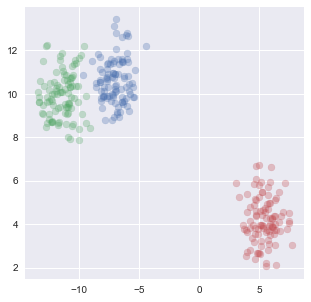

In [77]:
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn')

N, n_feature = 100, 2
n_class = 3

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0,1), dtype=tf.int32)

fig, ax = plt.subplots(figsize=(5,5))
for class_idx in range(n_class):
    center = tf.random.uniform(minval=-15, maxval=15, shape=(2,))
    x1 = center[0] + tf.random.normal(shape=(N,1))
    x2 = center[1] + tf.random.normal(shape=(N,1))
    
    #print(f"center[0]: {center[0]}, center[1]:{center[1]}")
    #print(f"x1 ======================================= \n{x1}")
    #print(f"x2 ======================================= \n{x2}")
    
    x = tf.concat((x1,x2), axis=1)
    y = class_idx*tf.ones(shape=(N, 1), dtype=tf.int32)
    print(f"x concat ================================= \n{x.numpy()}")
    print(f"y ======================================== \n{y.numpy()}")
    
    ax.scatter(x[:,0].numpy(), x[:,1].numpy(), alpha=0.3)
    
    X = tf.concat((X, x), axis=0)    
    Y = tf.concat((Y, y), axis=0)
    
    print(f"X ======================================== \n{X.numpy()}")
    print(f"X.shape: {X.shape}")
    print(f"Y ======================================== \n{Y.numpy()}")
    print(f"Y.shape: {Y.shape}")



In [83]:
batch_size = 50
dataset = tf.data.Dataset.from_tensor_slices((X,Y))
dataset = dataset.batch(batch_size)

### 위에서 데이터셋을 만들어주었으니 모델과 로스를 계산해보자

In [86]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = Dense(units=n_class, activation='softmax')
loss_object = SparseCategoricalCrossentropy()

for x, y in dataset:
    predictions = model(x)
    #print(predictions.shape, y.shape)
    loss = loss_object(y, predictions)
    print(loss.numpy())

4.2763267
4.2728257
0.00017125865
0.00016403712
11.761181
11.801432


# Categorical Cross Entropy

## CCE calculation

In [98]:
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy

batch_size, n_lcass = 50, 3

predictions = tf.random.uniform(shape=(batch_size, n_class),
                                minval=0, maxval=1,
                                dtype=tf.float32)
pred_sum = tf.reduce_sum(predictions, axis=1)
pred_sum = tf.reshape(pred_sum, (-1, 1))

predictions = predictions/pred_sum

labels = tf.random.uniform(shape=(batch_size, ),
                           minval=0, maxval=n_class,
                           dtype=tf.int32)

print(labels)

labels = tf.one_hot(labels, n_class)
print(labels)

loss_object = CategoricalCrossentropy()
loss = loss_object(labels, predictions)

print(f"loss  {loss}")


tf.Tensor(
[2 2 2 1 0 1 2 0 0 0 0 1 2 0 1 2 0 0 2 1 2 2 2 2 1 0 1 0 0 2 0 0 1 0 1 1 0
 2 0 2 0 0 1 1 1 2 1 2 0 2], shape=(50,), dtype=int32)
tf.Tensor(
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]], shape=(50, 3), dtype=float32)
loss  1.2677676677703857


In [99]:
temp = -labels*tf.math.log(predictions)
print(temp.shape)

temp = tf.reduce_sum(temp, axis=1)
print(temp.shape)

temp = tf.reduce_mean(temp)
print(temp.shape)

print(f"loss manual  {temp}")

(50, 3)
(50,)
()
loss manual  1.2677676677703857


## CCE with Model/Dataset

In [105]:
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy


N, n_feature = 100, 2
n_class = 3
batch_size = 50

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, ), dtype=tf.int32)

for class_idx in range(n_class):
    center = tf.random.uniform(minval=-15, maxval=15, shape=(2,))
    x1 = center[0] + tf.random.normal(shape=(N,1))
    x2 = center[1] + tf.random.normal(shape=(N,1))
    
    x = tf.concat((x1,x2), axis=1)
    y = class_idx*tf.ones(shape=(N, ), dtype=tf.int32)
   
    X = tf.concat((X, x), axis=0)    
    Y = tf.concat((Y, y), axis=0)

Y = tf.one_hot(Y,depth=n_class, dtype=tf.int32)

dataset = tf.data.Dataset.from_tensor_slices((X,Y))
dataset = dataset.batch(batch_size)

model = Dense(units=n_class, activation='softmax')
loss_object = CategoricalCrossentropy()

for x, y in dataset:
    predictions=model(x)
    loss = loss_object(y, predictions)
    print(loss.numpy())

2.5952005
2.5078032
0.08845676
0.05119948
1.5972345
1.5558509
